In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DMML/Codebasics/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Here seems to be 3571 employees left the firm where 11428 has retained

In [11]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the above table we can draw some conclusions on employee retention


1. Satisfaction Level: Satisfaction level seems to be low (0.44) among the employees who left the firm rather than the employees who retained (0.66).
2. Average_montly_hours: Average monthly hours are higher in employees leaving the firm (207.4) rather then those who retained (199.06).
3. Promotion_last_5years: Employees who get the promotion are likely to retain in the firm (0.026) vs the employees who left got (0.005).



**Impact of salary on employee retention**

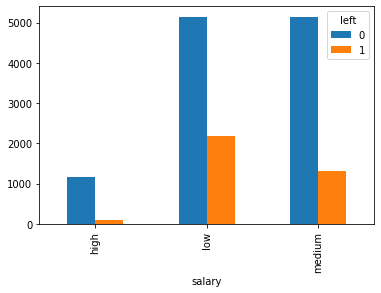

In [13]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

Above bar chart shows that employess who get the high amount of salary are likely to not leave the company.

Corelation between department and employee rentention

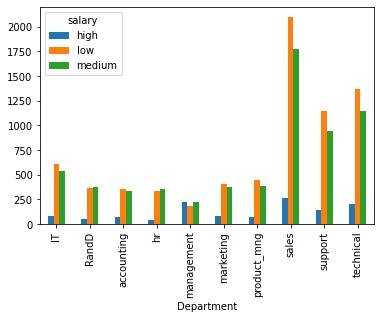

In [15]:
pd.crosstab(df['Department'], df['salary']).plot(kind='bar')

From the above analysis we can select some variables as independent variable for further analysis.

Those independent variables are: 
1. satisfaction_level
2. average_montly_hours
3. time_spend_company
4. salary

In [18]:
df1 = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'salary']]
df1.head()

,satisfaction_level,average_montly_hours,time_spend_company,salary
0,0.38,157,3,low
1,0.80,262,6,medium
2,0.11,272,4,medium
3,0.72,223,5,low
4,0.37,159,3,low


Here salary column is having categorical values which should be encoded in some form; for example: one hot encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False,
                   handle_unknown='error')

In [20]:
ohe = oh.fit_transform(df[['salary']])
ohe

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [21]:
new_salary = pd.DataFrame(ohe,columns=['salary_high','salary_low','salary_medium'])
new_salary.head()

,salary_high,salary_low,salary_medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [23]:
df_new = pd.concat([df1,new_salary], axis='columns')
df_new.head()

,satisfaction_level,average_montly_hours,time_spend_company,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,low,0.0,1.0,0.0
1,0.80,262,6,medium,0.0,0.0,1.0
2,0.11,272,4,medium,0.0,0.0,1.0
3,0.72,223,5,low,0.0,1.0,0.0
4,0.37,159,3,low,0.0,1.0,0.0


In [26]:
#droping the salary column as it is already encoded using OneHotEncoder

df_new.drop(["salary"], axis='columns', inplace=True)
df_new.head()

,satisfaction_level,average_montly_hours,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,157,3,0.0,1.0,0.0
1,0.80,262,6,0.0,0.0,1.0
2,0.11,272,4,0.0,0.0,1.0
3,0.72,223,5,0.0,1.0,0.0
4,0.37,159,3,0.0,1.0,0.0


In [27]:
X = df_new

In [28]:
y = df.left

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
lr.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

**Accuracy of the model**

In [38]:
lr.score(X_test, y_test)

0.7626666666666667